# Ecuaciones diferenciales y sistemas dinámicos

## Ejercicio 1

Resolver oscilador amortiguado:
$$m \ddot x=-k x -b \dot x,$$
usando $m=k=b=1$ y $x_0=1$, $\dot x_0=0$.
Usen Euler Y Runge-Kutta orden 4, comparen las soluciones, es decir, grafiquen el espacio de fase para cada método y despues juntos.
__Nota:__ El método de Runge-Kutta esta dentro de la familia de métodos simplécticos, es decir, preserva el volumen en el espacio de fase, algo particularmente útil cuanto tenemos sistemas que conservan la energia, a diferencia de _Euler_ que no lo hace. Observen que al no haber cantidades conservadas para el oscilador amortiguado, Euler funcione mucho mejor que en el otro caso, pues el oscilador amortiguado no conserva el volumen del espacio de fase.

Para resolver este problema, recordemos las funciones que hicimos para crear una lista con valores $t_k$, para el método de Euler explícito en dos dimensiones y Runge-Kutta de orden 4 en dos dimensiones:

In [40]:
# Primero definimos la función que nos da la lista de elementos de nuestra partición en función t0, tf y h

function listt(t0,tf,h)
    
    listt = linspace(t0,tf,Int(round((tf-t0)/h)))
    
    return listt
end

listt (generic function with 1 method)

In [41]:
# Definimos una función para resolver una ecuación diferencial vectorial dada por g(x,u) y h(x,u) usando el método de Euler. Los parámetros son las funciones g y h, dos condiciones iniciales x0 = x(t0) y u0 = u(t0) y una lista de los elementos t_k

function metodo_euler2(f,g,x0,u0,listt)
    
    listx = zeros(length(listt)) # Lista vacía que contendrá los elementos x(t_k)
    listu = zeros(length(listt)) # Lista vacía que contendrá los elementos u(t_k)
    
    h = listt[2]-listt[1] # Definimos un nuevo valor de h como la diferencia entre dos elementos consecutivos de la lista de los valores de t
    
    # Introducimos nuestras condiciones iniciales
    x = x0 
    u = u0
    
    # Introducimos nuestras condiciones iniciales x0 y u0 como los primeros elementos en la listas listx, listu respectivamente
    listx[1] = x0
    listu[1] = u0
    
    # Hacemos un ciclo que nos guarde los valores de x(t_(k+1)) y u(t_(k+1)) usando los valores de x(t_k) y u(t_k). Notemos que hay que calcular tanto x(t_k) como u(t_k) antes de calcular x(t_(k+1)) y u(t_(k+1)). Finalmente, los valores de x(t_k) y u(t_k) se guardan en las listas listx y listu respectivamente.
    
    for i in 2:length(listt)
        
        x = x + h*f(listt[i-1], listx[i-1], listu[i-1]) # x(t) esta dado por g(t,x,u)
        u = u + h*g(listt[i-1], listx[i-1], listu[i-1]) # u(t) esta dado por h(t,x,u)
        
        listx[i] = x
        listu[i] = u
        
    end
    
    return listt,listx,listu
    
end

metodo_euler2 (generic function with 1 method)

In [42]:
# Definimos nuestra función del método de Runge-Kutta de orden 4 para una sistema de dos ecuaciones:

function runge_kutta_4_2(f,g,x0,u0,listt)
    
    listx = zeros(length(listt)) # Lista vacía que contendrá los elementos x(t_k)
    listu = zeros(length(listt)) # Lista vacía que contendrá los elementos u(t_k)
    h = listt[2] - listt[1]
    
    # Condiciones iniciales
    x = x0
    u = u0
    
    # Introducimos nuestra condiciones iniciales x0 y u0 como los primeros elementos en las listas listx y listu respectivamente
    listx[1] = x0
    listu[1] = u0
    
    for i in 2:length(listt)
    
    # Suponiendo que f,g dependen de t, x y u. Además, los valores k1, k2, k3 y k4 corresponden a la función f, que define la ecuación diferencial para x(t), y l1, l2, l3, y l4 corresponden a la función g, que define la ecuación diferencial para u(t). Por ello, al calcular ki, li, para i=2,3,4, se tiene que introducir ki-1 en la segunda entrada de las funciones f(t,x,u), g(t,x,u) que corresponde a la entrada para la variable x e introducir li_1 en la tercera entrada de las mismas funciones que corresponde a la entrada para la variable u.
        
    k1 = f(listt[i-1], listx[i-1], listu[i-1])
    l1 = g(listt[i-1], listx[i-1], listu[i-1])
        
    k2 = f(listt[i-1] + h/2, listx[i-1] + h*(k1)/2, listu[i-1] + h*(l1)/2)
    l2 = g(listt[i-1] + h/2, listx[i-1] + h*(k1)/2, listu[i-1] + h*(l1)/2)
        
    k3 = f(listt[i-1] + h/2, listx[i-1] + h*(k2)/2, listu[i-1] + h*(l2)/2)
    l3 = g(listt[i-1] + h/2, listx[i-1] + h*(k2)/2, listu[i-1] + h*(l2)/2)
        
    k4 = f(listt[i-1] + h, listx[i-1] + h*(k3), listu[i-1] + h*(l3))
    l4 = g(listt[i-1] + h, listx[i-1] + h*(k3), listu[i-1] + h*(l3))   
    
        
    # Sumamos las aportaciones de ki según el método de Runge-Kutta de orden 4
    x = x + h*(k1 + 2*(k2) + 2*(k3) + k4)/6 
    u = u + h*(l1 + 2*(l2) + 2*(l3) + l4)/6
    
    # Guardamos los valores de xi, ui en las respectivas listas
    listx[i] = x
    listu[i] = u
        
    end
    
    return listt,listx,listu
end

runge_kutta_4_2 (generic function with 1 method)

Como $b=k=b=1$, la ecuación diferencial que queremos resolver queda de la forma: $$\ddot x= -x -\dot x.$$ Sea $u(t)=\dot x(t)$. Entonces, obtenemos el siguiente sistema de ecuaciones: $$\dot x(t) = u(t)$$ $$\dot u(t) = -u(t) - x(t).$$

In [43]:
# Escribimos las funciones que definen nuestra ecuación diferencial:

f1(t,x,u) = u
f2(t,x,u) = -u -x

f2 (generic function with 1 method)

In [44]:
# Definimos nuestras listas con valores t_k para valores h dados

t1 = listt(0,50,0.5)
t2 = listt(0,50,0.2)
t3 = listt(0,50,0.1)
t4 = listt(0,50,0.01)
t5 = listt(0,50,0.001)

0.0:0.001000020000400008:50.0

In [45]:
# Evaluamos el método de Euler explícito en dos dimensiones en las listas t_k

M1 = metodo_euler2(f1,f2,1,0,t1)
M2 = metodo_euler2(f1,f2,1,0,t2)
M3 = metodo_euler2(f1,f2,1,0,t3)
M4 = metodo_euler2(f1,f2,1,0,t4)
M5 = metodo_euler2(f1,f2,1,0,t5)

(0.0:0.001000020000400008:50.0, [1.0, 1.0, 0.999999, 0.999997, 0.999994, 0.99999, 0.999985, 0.999979, 0.999972, 0.999964  …  6.05066e-12, 6.06076e-12, 6.07083e-12, 6.08089e-12, 6.09094e-12, 6.10097e-12, 6.11098e-12, 6.12098e-12, 6.13096e-12, 6.14092e-12], [0.0, -0.00100002, -0.00199904, -0.00299706, -0.00399408, -0.0049901, -0.00598512, -0.00697914, -0.00797216, -0.00896418  …  1.00931e-11, 1.0077e-11, 1.00608e-11, 1.00447e-11, 1.00286e-11, 1.00124e-11, 9.99634e-12, 9.98023e-12, 9.96413e-12, 9.94803e-12])

In [46]:
# Evaluamos el método de Runge-Kutta de orden 4 en dos dimensiones en las listas t_k

R1 = runge_kutta_4_2(f1,f2,1,0,t1)
R2 = runge_kutta_4_2(f1,f2,1,0,t2)
R3 = runge_kutta_4_2(f1,f2,1,0,t3)
R4 = runge_kutta_4_2(f1,f2,1,0,t4)
R5 = runge_kutta_4_2(f1,f2,1,0,t5)

(0.0:0.001000020000400008:50.0, [1.0, 1.0, 0.999998, 0.999996, 0.999992, 0.999988, 0.999982, 0.999976, 0.999968, 0.99996  …  5.65021e-12, 5.66044e-12, 5.67065e-12, 5.68085e-12, 5.69104e-12, 5.70121e-12, 5.71136e-12, 5.72149e-12, 5.73161e-12, 5.74172e-12], [0.0, -0.00099952, -0.00199804, -0.00299556, -0.00399208, -0.0049876, -0.00598212, -0.00697564, -0.00796816, -0.00895968  …  1.02392e-11, 1.02233e-11, 1.02074e-11, 1.01915e-11, 1.01757e-11, 1.01598e-11, 1.01439e-11, 1.01281e-11, 1.01122e-11, 1.00964e-11])

In [47]:
# Mandamos a llamar `PyPlot` para graficar nuestras funciones

using PyPlot

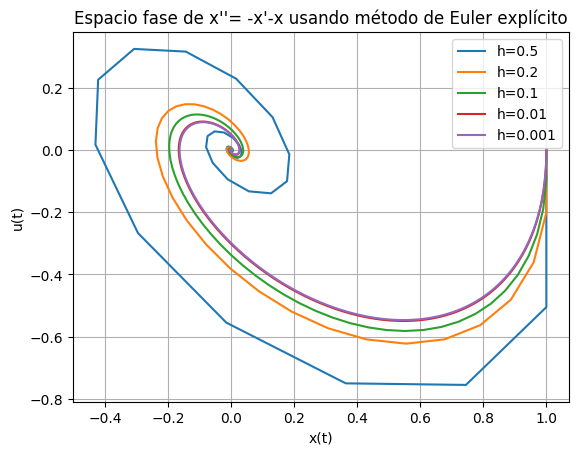

PyObject <matplotlib.legend.Legend object at 0x7f155922a490>

In [48]:
# Graficamos el espacio fase dado por nuestras aproximaciones usando método de Euler explícito

plot(M1[2],M1[3], label="h=0.5")
plot(M2[2],M2[3], label="h=0.2")
plot(M3[2],M3[3], label="h=0.1")
plot(M4[2],M4[3], label="h=0.01")
plot(M5[2],M5[3], label="h=0.001")

title("Espacio fase de x''= -x'-x usando método de Euler explícito")
xlabel("x(t)")
ylabel("u(t)")

grid("on")
legend()

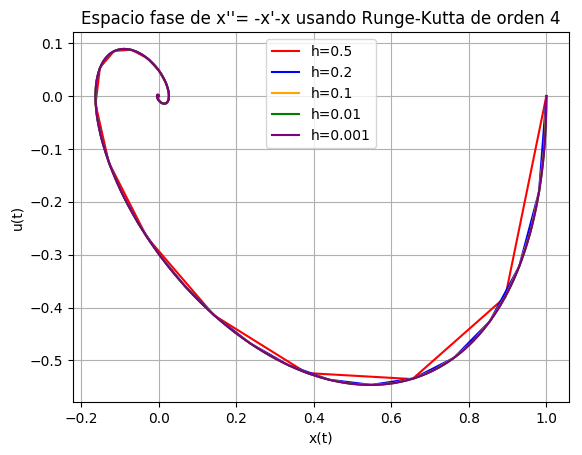

PyObject <matplotlib.legend.Legend object at 0x7f15588c6490>

In [49]:
# Graficamos el espacio fase dado por nuestras aproximaciones usando método de Runge-Kutta de orden 4

plot(R1[2],R1[3], label="h=0.5", color="red")
plot(R2[2],R2[3], label="h=0.2", color="blue")
plot(R3[2],R3[3], label="h=0.1", color="orange")
plot(R4[2],R4[3], label="h=0.01", color="green")
plot(R5[2],R5[3], label="h=0.001", color="purple")

title("Espacio fase de x''= -x'-x usando Runge-Kutta de orden 4")
xlabel("x(t)")
ylabel("u(t)")

grid("on")
legend()

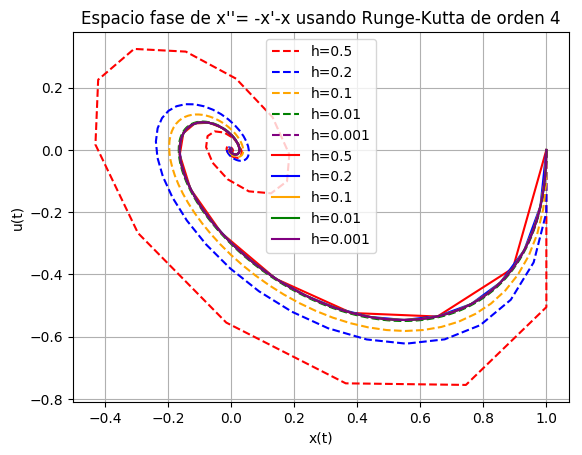

PyObject <matplotlib.legend.Legend object at 0x7f15591f1d50>

In [50]:
# Graficamos el espacio fase dado por ambos métodos

# Euler explícito
plot(M1[2],M1[3], label="h=0.5", color="red", linestyle="--")
plot(M2[2],M2[3], label="h=0.2", color="blue", linestyle="--")
plot(M3[2],M3[3], label="h=0.1", color="orange", linestyle="--")
plot(M4[2],M4[3], label="h=0.01", color="green", linestyle="--")
plot(M5[2],M5[3], label="h=0.001", color="purple", linestyle="--")

# Runge-Kutta de orden 4
plot(R1[2],R1[3], label="h=0.5", color="red")
plot(R2[2],R2[3], label="h=0.2", color="blue")
plot(R3[2],R3[3], label="h=0.1", color="orange")
plot(R4[2],R4[3], label="h=0.01", color="green")
plot(R5[2],R5[3], label="h=0.001", color="purple")

title("Espacio fase de x''= -x'-x usando Runge-Kutta de orden 4")
xlabel("x(t)")
ylabel("u(t)")

grid("on")
legend()

Las curvas punteadas corresponden a las aproximaciones dadas por Euler explícito y las curvas normales por Runge-Kutta de orden 4. De las curvas normales se observa que convergen inmediatamente mientras que para Euler no es así. Sin embargo, para Euler se observa que las curvas conservan las proporciones del espacio fase.

## Ejercicio 2 

Resolver el péndulo simple:
$$l \ddot\theta=-g \sin(\theta),$$
usando Runge-Kutta orden 4. Gráficar muchas condiciones iniciales (lo mas facil es que sean aleatorias) en el espacio de fase usando $l=g=1$. Ajuste el rango de la gráfica para que se centre cerca del cero para que se puedan observar los dos tipos de movimiento presentes. Coménte e interprete las soluciones.
e
Tomando $l=g=1$, la ecuación diferencial queda como: $$\ddot\theta=-\sin(\theta).$$ Haciendo el cambio $\phi(t) = \dot\theta(t)$. Con esto, obtenemos el siguiente sistema de ecuaciones: $$\dot\theta(t) = \phi(t)$$ $$\dot\phi(t) = -\sin(\theta)$$ 

In [51]:
# Escribimos las funciones que definen nuestra ecuación diferencial:

g1(t,x,u) = u
g2(t,x,u) = -sin(x)

g2 (generic function with 1 method)

In [52]:
# Definimos nuestra lista con valores t_k para h=0.01

T = listt(-4*pi,4*pi,0.01)

-12.566370614359172:0.010005072145190424:12.566370614359172

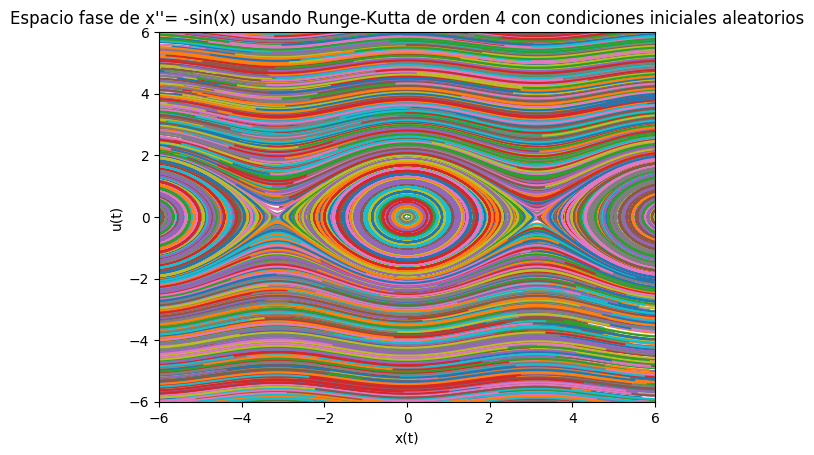

In [53]:
# Graficando el espacio fase para 7500 condiciones iniciales:

for i in 1:7500
    
    # Creamos un arreglo cuyas dos entradas son valores aleatorios entre -7 y 7
    R = 7*(2*rand(1,2)-1)
    
    # Introducimos las condiciones iniciales en la función del método de Runge-Kutta de orden 4 para dos dimensiones
    X = runge_kutta_4_2(g1,g2,R[1],R[2],T)
    
    # Graficamos x(t) (X[2]) contra u(t) (X[3])
    plot(X[2],X[3])
    
end
    
# Fijamos los límites de nuestra gráfica de [-6,6] para ambos ejes.
gca()[:set_xlim]((-6,6))
gca()[:set_ylim]((-6,6))
    
title("Espacio fase de x''= -sin(x) usando Runge-Kutta de orden 4 con condiciones iniciales aleatorios")
xlabel("theta(t)")
ylabel("phi(t)")

grid("on")
show()

Contrario a lo que se observa en el espacio fase del oscilador armónico, no todas las curvas son cerradas y las que lo son, no son necesariamente una elipse. La aproximación para $\theta$ pequeño se observa en esta gráfica y corresponde a dichas curvas cerradas y mientras $\theta$ crece, las curvas se deforman hasta ya no ser cerradas.

## Ejercicio 3

Comprobar numéricamente (con Runge-Kutta orden $4$) que en el sistema:
$$\frac{dx}{dt}=x^2-1,$$
hay dos _puntos fijos_, ubicados en $1$ y $-1$, compruebe además que el $1$ es un _repulsor_ y el $-1$ un _atractor_. Para hacer esto necesitará graficar muchas condiciones iniciales, generelas aleatoriamente y gráfiquelas en el espacio $(x(t),t)$.

In [54]:
function runge_kutta_4(f,x0,listt)
    
    listx = zeros(length(listt)) # Lista vacía que contendrá los elementos x(t_k)
    h = listt[2] - listt[1]
    
    # Condición inicial
    x = x0 
    
    # Introducimos nuestra condición inicial x0 como el primer elemento en la lista listx
    listx[1] = x0
    
    # Método de Runge-Kutta de orden 4
    for i in 2:length(listt)
    
        k1 = f(listt[i-1], listx[i-1])
        k2 = f(listt[i-1] + h/2, listx[i-1] + h*(k1)/2)
        k3 = f(listt[i-1] + h/2, listx[i-1] + h*(k2)/2)
        k4 = f(listt[i-1] + h, listx[i-1] + h*(k3))
    
        x = x + h*(k1 + 2*(k2) + 2*(k3) + k4)/6
        listx[i] = x
        
    end
    
    return listt,listx
end

runge_kutta_4 (generic function with 1 method)

In [55]:
# Escribimos la función que define nuestra ecuación diferencial

h2(t,x) = x^2 - 1

h2 (generic function with 1 method)

In [56]:
U = listt(0,20,0.01)

0.0:0.010005002501250625:20.0

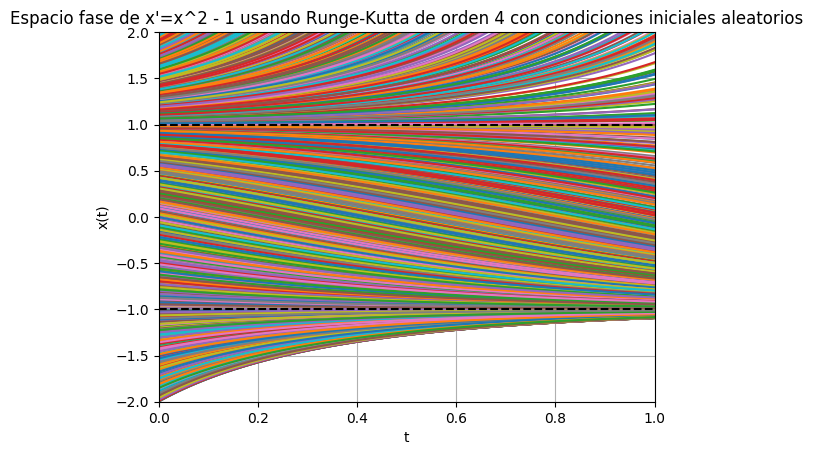

In [57]:
# Graficando para 3000 condiciones iniciales:

for i in 1:3000
    
    # Creamos un arreglo cuyas dos entradas son valores aleatorios entre -2 y 2
    R = 2*(2*rand(1)-1)
    
    # Introducimos las condiciones iniciales en la función del método de Runge-Kutta de orden 4 para una dimensión
    X = runge_kutta_4(h2,R[1],U)
    
    # Graficamos t (X[1]) contra x(t) (X[2])
    plot(X[1],X[2])
    
end

# Graficamos las rectas x=1 y x=-1

L = ones(length(U))
plot(U,L, color="black", linestyle="--")
plot(U,-L,color="black", linestyle="--")

# Fijamos los límites de los ejes de nuestra gráfica.
gca()[:set_xlim]((-0,1))
gca()[:set_ylim]((-2,2))
    
title("Espacio fase de x'=x^2 - 1 usando Runge-Kutta de orden 4 con condiciones iniciales aleatorios")
xlabel("t")
ylabel("x(t)")

grid("on")
show()

Se puede observar que las curvas solución a la ecuación diferencial se alejan de la recta $x=1$ y se acercan a $x=-1$ mientras $t$ crece. Por ello, concluimos que $x=1$ es un punto repulsor y $x=-1$ es un atractor.

## Ejercicio 4

También con Runge-Kutta orden $4, $Resuelva numéricamente el sistema:
$$\frac{dx}{dt}=x^2,$$
cual es el punto fijo único?, es un _atractor_ o un _repulsor_?. Utilice de igual forma muchas condiciones iniciales y gráfiquelas en el mismo espacio que en el ejercicio anterior.

In [58]:
# Escribimos la función que define nuestra ecuación diferencial

h3(t,x) = x^2

h3 (generic function with 1 method)

In [59]:
# Definimos nuestra lista con valores t_k

V = listt(0,10,0.01)

0.0:0.01001001001001001:10.0

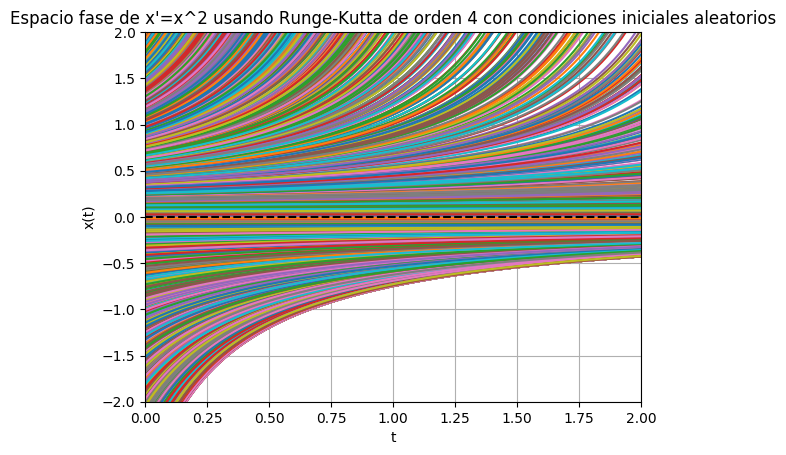

In [60]:
# Graficando x(t) para 4000 condiciones iniciales:

for i in 1:4000
    
    # Creamos un arreglo cuyas dos entradas son valores aleatorios entre -3 y 3
    R = 3*(2*rand(1)-1)
    
    # Introducimos las condiciones iniciales en la función del método de Runge-Kutta de orden 4 para una dimensión
    X = runge_kutta_4(h3,R[1],V)
    
    # Graficamos t (X[1]) contra x(t) (X[2])
    plot(X[1],X[2])
    
end

# Graficamos las recta x=0
L = zeros(length(V))

plot(V,L, color="black", linestyle="--")

# Fijamos los límites de los ejes de nuestra gráfica
gca()[:set_xlim]((0,2))
gca()[:set_ylim]((-2,2))
    
title("Espacio fase de x'=x^2 usando Runge-Kutta de orden 4 con condiciones iniciales aleatorios")
xlabel("t")
ylabel("x(t)")

grid("on")
show()

Se puede observar que $x=0$ es un punto silla del sistema ya que para $x<0$ se comporta como un atractor y para $x>0$ se comporta como un repulsor.

## Ejercicio 5

Resolver con Runge-Kutta orden $4$ el sistema de ecuaciones:
$$\frac{d\vec x}{dt}=\left(\begin{array}{cc} a & b \\ c & d \end{array}\right)\vec x,$$
donde $\vec x= \left(x(t),y(t)\right)^{\text{T}}.$
Grafique los espacios de fase tomando muchas condiciones iniciales aleatorias y fijando los rangos de los ejes alrededor del origen, de tal forma que se aprecie el compotamiento de las soluciones. Haga esto para los sistemas con:
* $a=b=1$, $c=d=0$
* $a=b=-1$, $c=d=0$
* $a=1$, $b=-2$, $c=d=0$
* $a=1$, $b=-0.5$, $c=d=0$
* $a=d=0$, $b=-c=1$
* $a=d=1$, $b=-c=1$
* $a=d=-1$, $b=-c=1$
* $a=d=-1$, $b=-c=-1$
* $a=b=1$, $b=4,c=-2$
* $a=b=d=-1$, $c=0$

In [61]:
# Definimos nuestra lista con valores t_k que usaremos para todo el ejercicio

Z = listt(0,20,0.01)

0.0:0.010005002501250625:20.0

In [62]:
# Para evitar estar copiando todo el código para cada uno de los ejercicios anteriores, se hizo la siguiente función para graficar el espacio fase que tiene como parámetros las dos funciones que definen el sistema de dos ecuaciones diferenciales F1 y F2 (para x y u respectivamente), la lista de valores t_k, listt, el intervalo de valores aleatorios A, el número de gráficas n y los limites en los ejes x y y:

function plot1(F1,F2,listt,A,n,x,y)

for i in 1:n
    
    # Creamos un arreglo cuyas dos entradas son valores aleatorios entre -3 y 3
    R = A*(2*rand(1,2)-1)
    
    # Introducimos las condiciones iniciales en la función del método de Runge-Kutta de orden 4 para una dimensión
    X = runge_kutta_4_2(F1,F2,R[1],R[2],listt)
    
    # Graficamos x(t) (X[2]) contra u(t) (X[3])
    plot(X[2],X[3])
    
end

# Fijamos los límites de los ejes de nuestra gráfica
gca()[:set_xlim]((-x,x))
gca()[:set_ylim]((-y,y))
    
title("Espacio fase de un sistema de ecuaciones de 2x2 usando Runge-Kutta de orden 4 con condiciones iniciales aleatorios")
xlabel("x(t)")
ylabel("u(t)")

#grid("on")
show()
    
end

plot1 (generic function with 1 method)

In [63]:
# Para a=b=1, c=d=0

A1(t,x,u) = x + u
A2(t,x,u) = 0

A2 (generic function with 1 method)

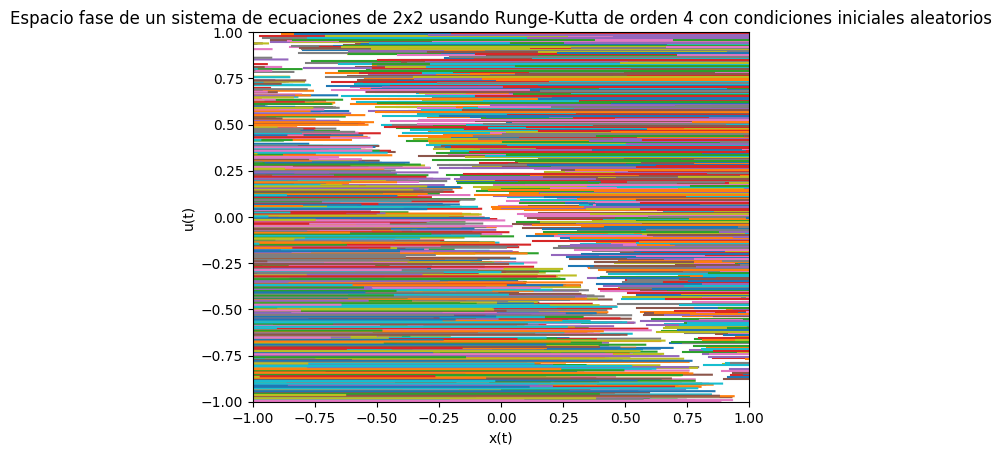

In [64]:
plot1(A1,A2,Z,1,3000,1,1)

Al observar este espacio fase podemos concluir que hay una discontinuidad en la recta $u(t)=-x(t)$. Además, se observa que las curven tienden a ir a dicha curva.

In [65]:
# Para a=b=-1, c=d=0

B1(t,x,u) = -x - u
B2(t,x,u) = 0

B2 (generic function with 1 method)

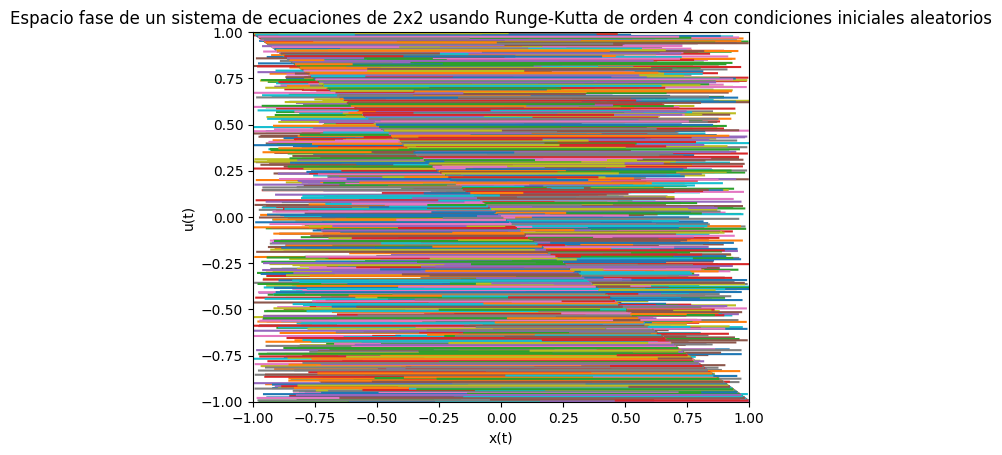

In [66]:
plot1(B1,B2,Z,1,3000,1,1)

De esta gráfica se observa que las curvas salen de la recta $u(t) = -x(t)$ y tienden hacia $\pm\infty$ según el lado en que están.

In [67]:
# Para a=1, b=-2 c=d=0

C1(t,x,u) = x - 2*u
C2(t,x,u) = 0

C2 (generic function with 1 method)

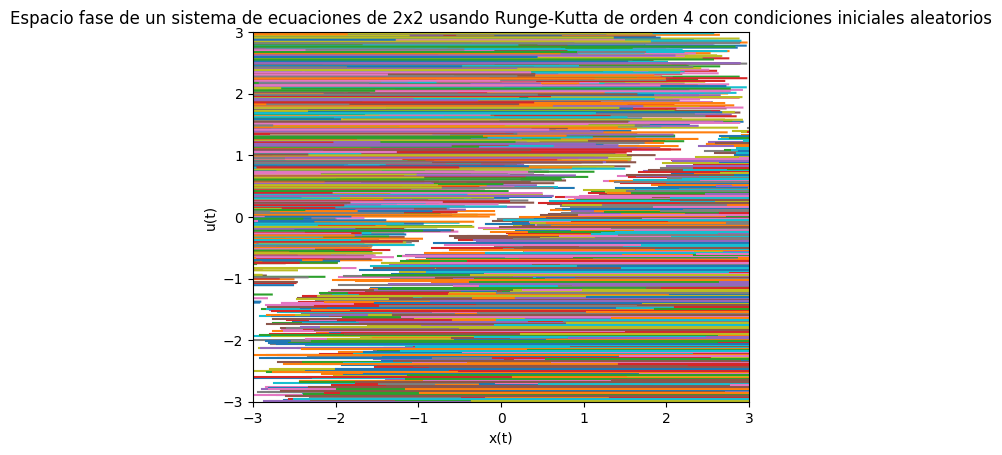

In [68]:
plot1(C1,C2,Z,3,3000,3,3)

Se observa que hay una discontiniudad en la recta $u(t)=\frac{1}{2}x(t)$ y que las curvas tienden hacia dicha recta.

In [69]:
# Para a=1, b=-0.5 c=d=0

D1(t,x,u) = x - 0.5*u
D2(t,x,u) = 0

D2 (generic function with 1 method)

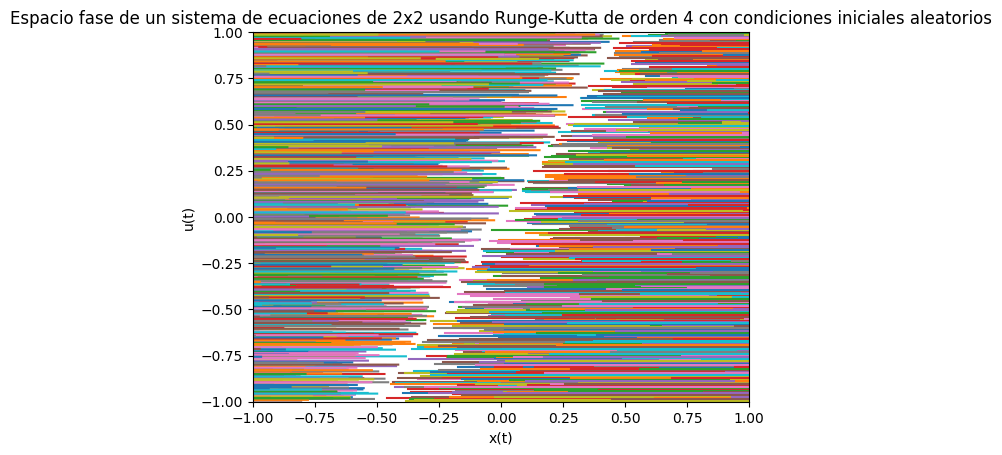

In [70]:
plot1(D1,D2,Z,1,3000,1,1)

Se observa que hay una discontiniudad en la recta $u(t)=2x(t)$ y que las curvas tienden hacia dicha recta.

In [71]:
# Para a=d=0, b=-c=1

E1(t,x,u) = u
E2(t,x,u) = -x

E2 (generic function with 1 method)

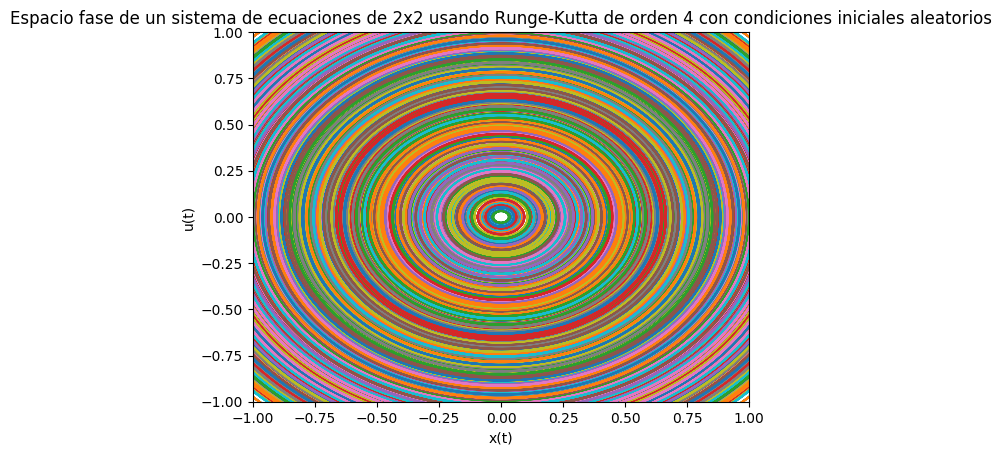

In [72]:
plot1(E1,E2,Z,1,3000,1,1)

Esta gráfica corresponde al espacio fase de un oscilador armónico y como es de esperarse, las curvas corresponden a elipses.

In [73]:
# Para a=d=1, b=-c=1

F1(t,x,u) = x + u
F2(t,x,u) = -x + u

F2 (generic function with 1 method)

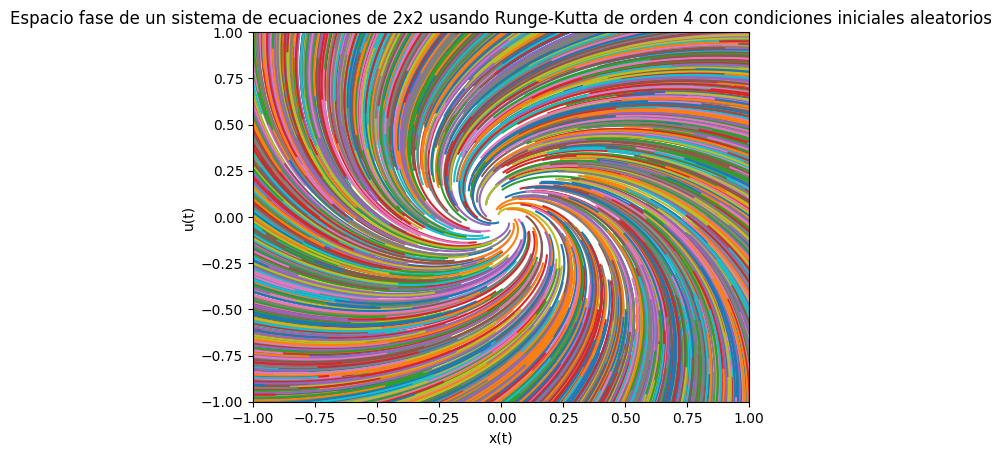

In [74]:
plot1(F1,F2,Z,1,3000,1,1)

El origen corresponde a un atractor y las curvas giran en sentido contrario a las manecillas del reloj.

In [75]:
# Para a=d=-1, b=-c=1

G1(t,x,u) = -x + u
G2(t,x,u) = -x - u

G2 (generic function with 1 method)

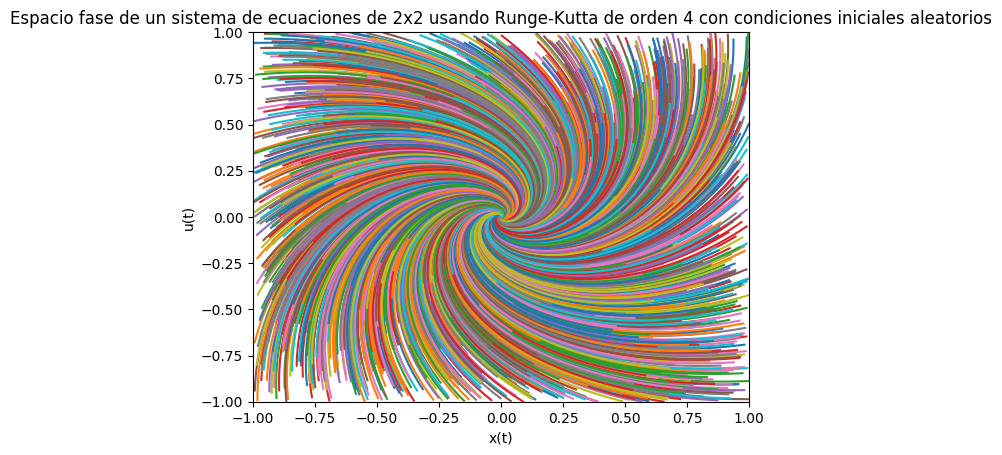

In [76]:
plot1(G1,G2,Z,1,3000,1,1)

El origen corresponde a un repulsor y las curvas giran en sentido de a las manecillas del reloj.

In [77]:
# Para a=d=-1, b=-c=-1

H1(t,x,u) = -x - u
H2(t,x,u) = x - u

H2 (generic function with 1 method)

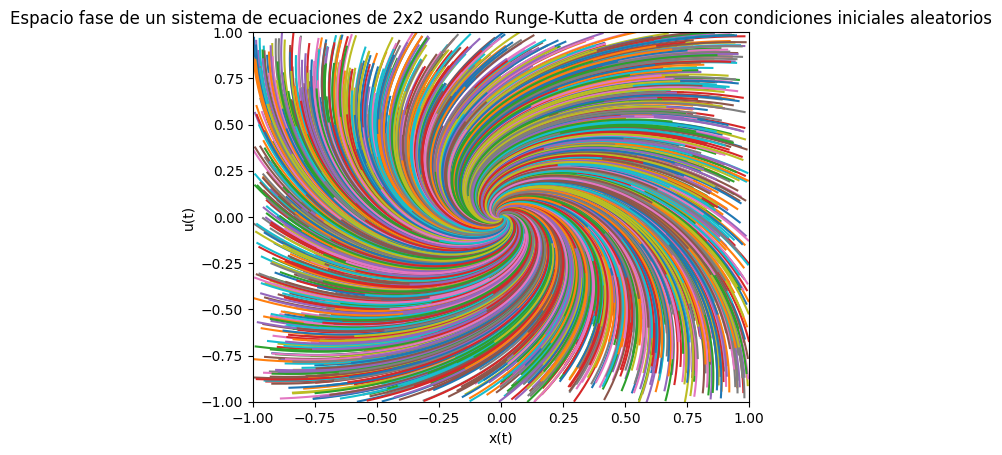

In [78]:
plot1(H1,H2,Z,1,3000,1,1)

In [79]:
# Para a=d=1, b=4, c=-2

I1(t,x,u) = x + 4*u
I2(t,x,u) = -2x + u

I2 (generic function with 1 method)

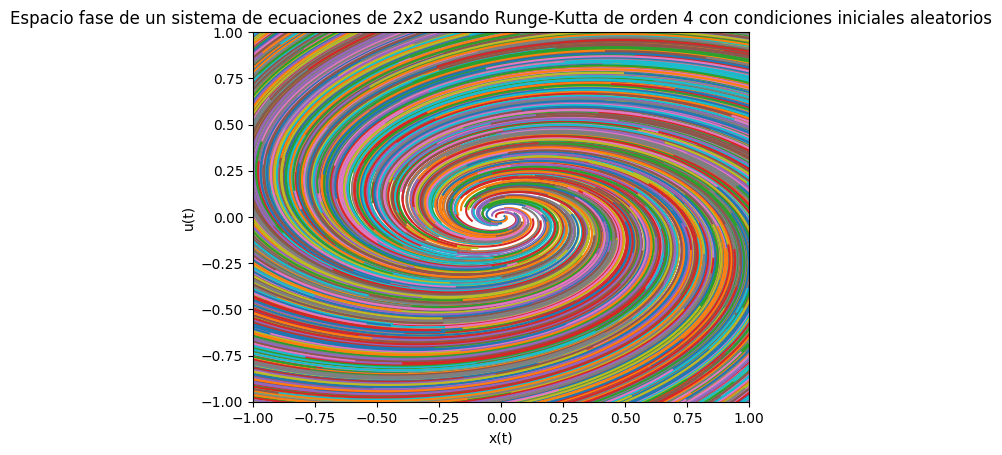

In [80]:
plot1(I1,I2,Z,1,3000,1,1)

In [81]:
# Para a=b=d=-1, c=0

J1(t,x,u) = -x - u
J2(t,x,u) = u

J2 (generic function with 1 method)

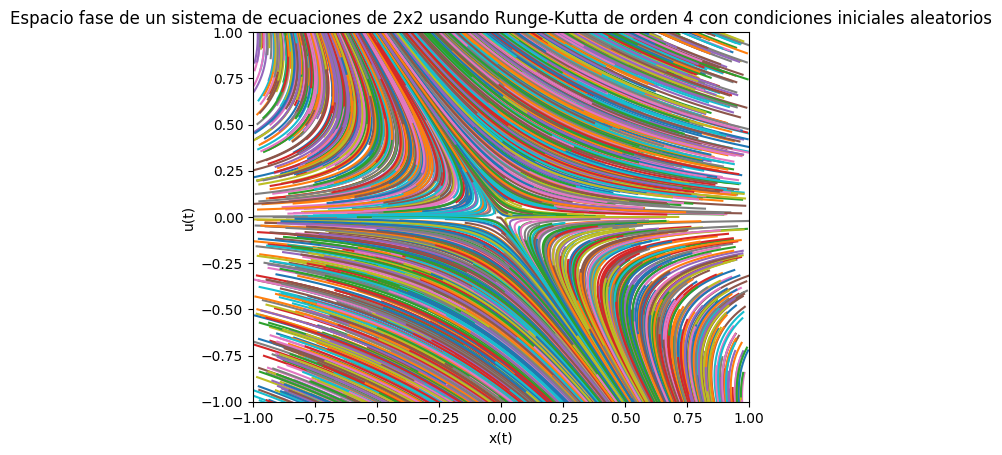

In [82]:
plot1(J1,J2,Z,1,3000,1,1)

Se puede observar que la recta $u(t)=-2x(t)$ es un repulsor y que la recta $u(t)=0$ es un atractor del sistema.